<a href="https://colab.research.google.com/github/ibnu666-beep/PBO_TIsem3_dvibnu/blob/main/PRAKTIKUM02-KlasifikasiGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


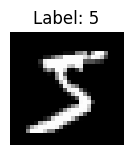

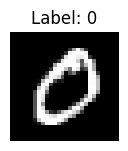

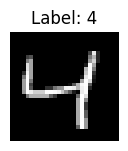

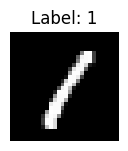

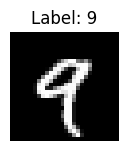

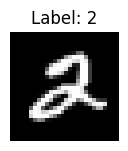

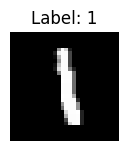

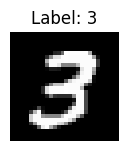

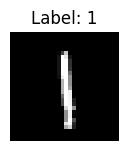

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3, 3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
  plt.show()

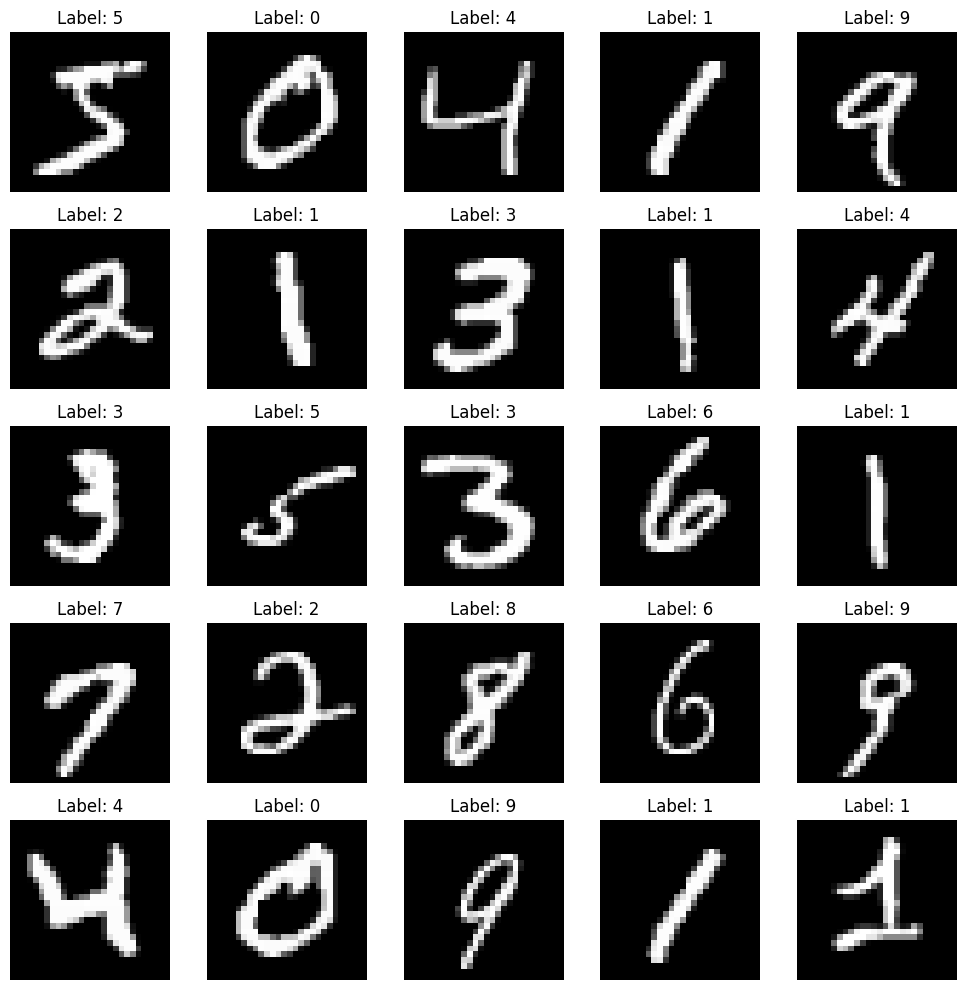

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure(figsize=(10,10)) # Increased figure size for better visualization
for i in range(25):
  plt.subplot(5, 5,i+1) # Changed to 5x5 grid
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
  # plt.show() # Removed plt.show() inside the loop to display all plots at once
plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show() # Show all plots after the loop

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

#svm
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) #gunakan subset karena svm berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

#svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) #gunakan subset karena svm berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8965 - loss: 0.3498 - val_accuracy: 0.9825 - val_loss: 0.0673
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9799 - loss: 0.0669 - val_accuracy: 0.9828 - val_loss: 0.0590
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9874 - loss: 0.0411 - val_accuracy: 0.9838 - val_loss: 0.0541
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9878 - val_loss: 0.0483
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9893 - val_loss: 0.0443


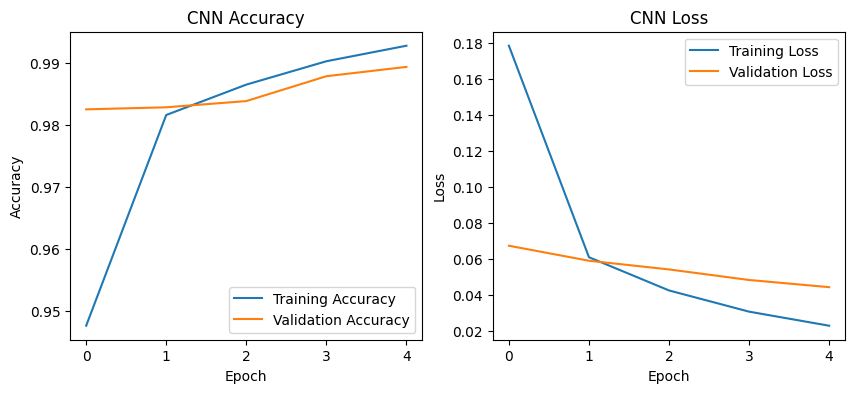

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# === plot history ===
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9074 - loss: 0.2982 - val_accuracy: 0.9845 - val_loss: 0.0537
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9846 - loss: 0.0469 - val_accuracy: 0.9863 - val_loss: 0.0434
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9867 - val_loss: 0.0441
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9890 - val_loss: 0.0393
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.9875 - val_loss: 0.0485


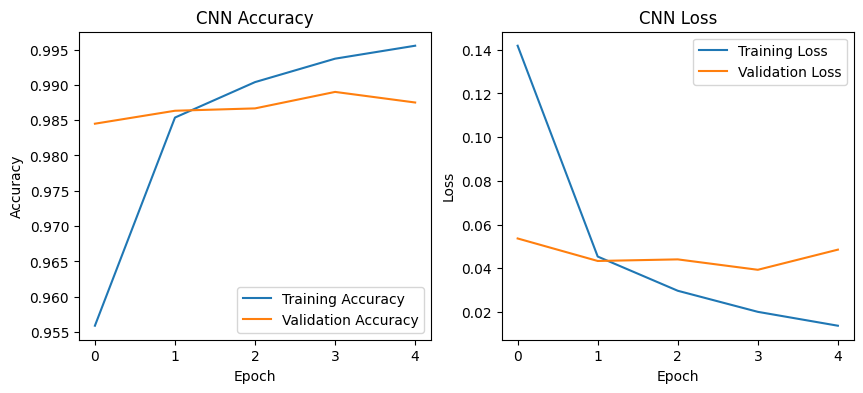

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# === plot history ===
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.3789 - loss: 1.7046 - val_accuracy: 0.5672 - val_loss: 1.2217
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.5950 - loss: 1.1581 - val_accuracy: 0.6316 - val_loss: 1.0699
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.6503 - loss: 1.0055 - val_accuracy: 0.6660 - val_loss: 0.9836
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6817 - loss: 0.9093 - val_accuracy: 0.6708 - val_loss: 0.9614
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7034 - loss: 0.8471 - val_accuracy: 0.6904 - val_loss: 0.8998
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7274 - loss: 0.7807 - val_accuracy: 0.6946 - val_loss: 0.8905
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.7491 - loss: 0.7232 - val_accuracy: 0.6972 - val_loss: 0.9094
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7683 -

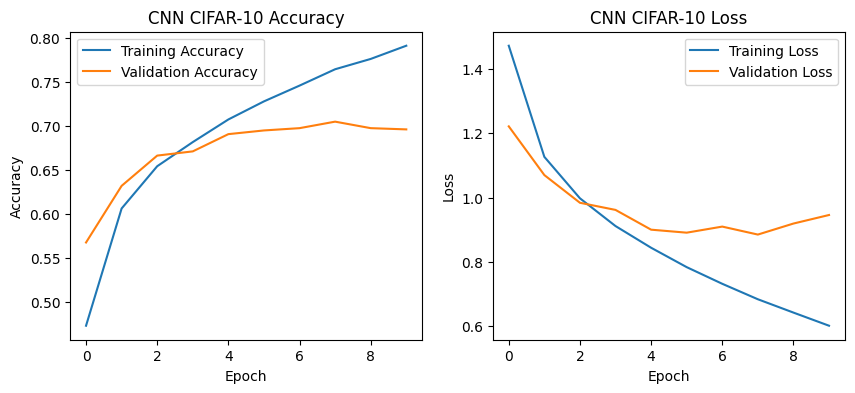

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# === plot history ===
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.3703 - loss: 1.7329 - val_accuracy: 0.5662 - val_loss: 1.2312
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.5800 - loss: 1.1827 - val_accuracy: 0.6296 - val_loss: 1.0597
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.6324 - loss: 1.0430 - val_accuracy: 0.6680 - val_loss: 0.9564
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6759 - loss: 0.9317 - val_accuracy: 0.6542 - val_loss: 1.0002
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7007 - loss: 0.8529 - val_accuracy: 0.6954 - val_loss: 0.8858
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7248 - loss: 0.7952 - val_accuracy: 0.7004 - val_loss: 0.8733
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.7416 - loss: 0.7363 - val_accuracy: 0.7002 - val_loss: 0.8643
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7578 -

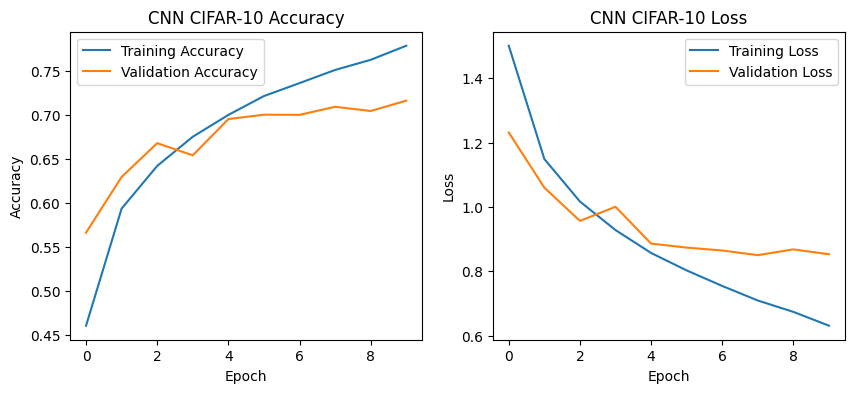

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# === plot history ===
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.2894 - loss: 1.9170 - val_accuracy: 0.5428 - val_loss: 1.3051
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 44ms/step - accuracy: 0.4766 - loss: 1.4422 - val_accuracy: 0.5866 - val_loss: 1.1849
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.5282 - loss: 1.3097 - val_accuracy: 0.6264 - val_loss: 1.0998
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.5602 - loss: 1.2268 - val_accuracy: 0.6394 - val_loss: 1.0309
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 93s 61ms/step - accuracy: 0.5810 - loss: 1.1705 - val_accuracy: 0.6648 - val_loss: 0.9703
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 135s 56ms/step - accuracy: 0.6052 - loss: 1.1030 - val_accuracy: 0.6802 - val_loss: 0.9451
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.6279 - loss: 1.0463 - val_accuracy: 0.6854 - val_loss: 0.9042
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 36ms/step - accuracy: 0.6367 

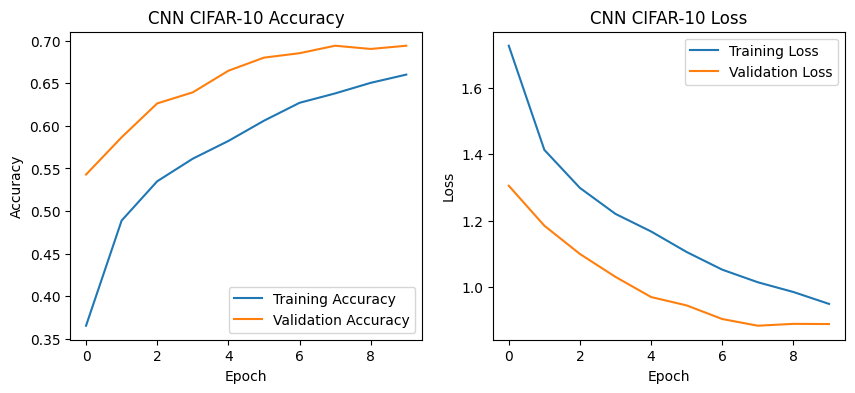

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Muat dan normalisasi data CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Bangun model dengan lapisan Dropout
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Lapisan Dropout ditambahkan di sini
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# === plot history ===
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 588s 417ms/step - accuracy: 0.4609 - loss: 1.5547 - val_accuracy: 0.5670 - val_loss: 1.2298
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 503s 357ms/step - accuracy: 0.5753 - loss: 1.2102 - val_accuracy: 0.5780 - val_loss: 1.1740
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 561s 357ms/step - accuracy: 0.5986 - loss: 1.1495 - val_accuracy: 0.6014 - val_loss: 1.1433
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 532s 378ms/step - accuracy: 0.6169 - loss: 1.0998 - val_accuracy: 0.5966 - val_loss: 1.1313
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 533s 357ms/step - accuracy: 0.6247 - loss: 1.0702 - val_accuracy: 0.6048 - val_loss: 1.1326


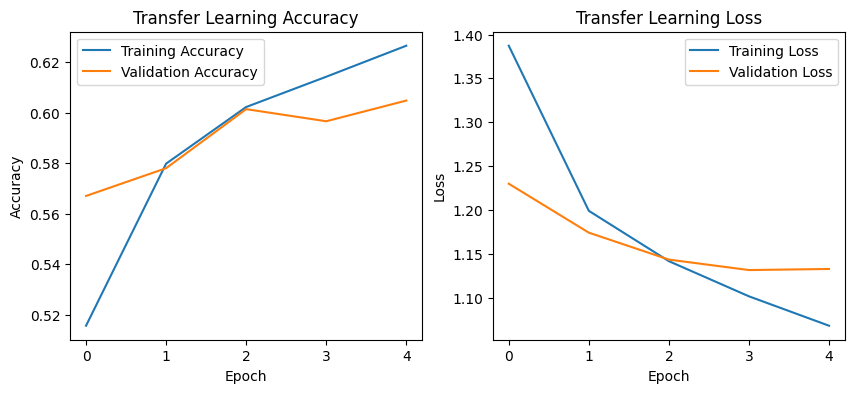

In [1]:
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

base_model = VGG16 (weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# == plot history ===
plt.figure(figsize=(10,4)) # Corrected figsize to be a tuple

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 323ms/step
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1000
           1       0.55      0.76      0.64      1000
           2       0.64      0.40      0.49      1000
           3       0.42      0.48      0.45      1000
           4       0.55      0.54      0.54      1000
           5       0.67      0.37      0.48      1000
           6       0.64      0.68      0.66      1000
           7       0.62      0.67      0.64      1000
           8       0.75      0.68      0.71      1000
           9       0.56      0.62      0.59      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



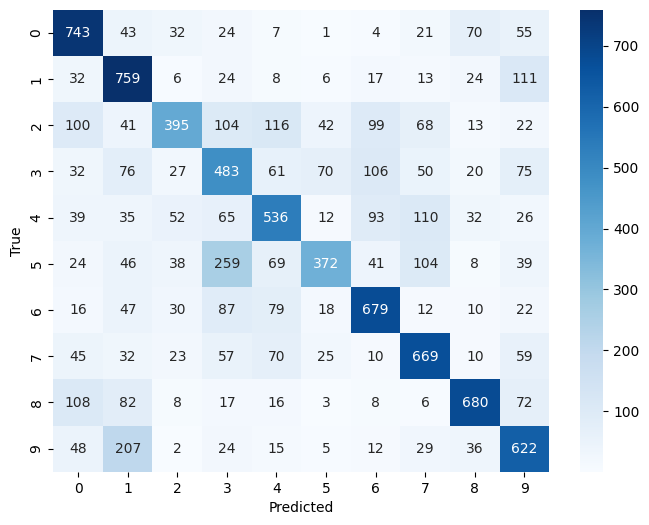

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
from google.colab import files
uploaded = files.upload()

Saving 5.jpg to 5 (2).jpg
Saving 6.jpg to 6 (2).jpg
Saving 7.jpg to 7 (2).jpg


In [23]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)  # harus (60000,28,28) dan (10000,28,28)

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# tambahin channel dimension
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))


(60000, 28, 28) (10000, 28, 28)


In [25]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.7963 - loss: 0.6570 - val_accuracy: 0.9835 - val_loss: 0.0616
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 85ms/step - accuracy: 0.9688 - loss: 0.1086 - val_accuracy: 0.9870 - val_loss: 0.0473
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9777 - loss: 0.0762 - val_accuracy: 0.9885 - val_loss: 0.0423
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.9817 - loss: 0.0632 - val_accuracy: 0.9907 - val_loss: 0.0371
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9893 - val_loss: 0.0376


In [28]:
loss, acc = model.evaluate(x_test, y_test)
print("Test accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0368
Test accuracy: 0.9889000058174133


In [29]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = 255 - img  # invert warna (opsional, kalau background putih)
    img = img.astype("float32") / 255.0
    img = img.reshape(1,28,28,1)
    return img

for fname in ["5.jpg","6.jpg","7.jpg"]:
    img = load_and_preprocess(fname)
    pred = model.predict(img)
    print(fname, "-> Prediksi:", np.argmax(pred), "(p=", np.max(pred), ")")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
5.jpg -> Prediksi: 7 (p= 0.44955167 )
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6.jpg -> Prediksi: 2 (p= 0.30507916 )
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
7.jpg -> Prediksi: 7 (p= 0.30839095 )


In [24]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Saving 5.jpg to 5 (3).jpg
Saving 6.jpg to 6 (3).jpg
Saving 7.jpg to 7 (3).jpg


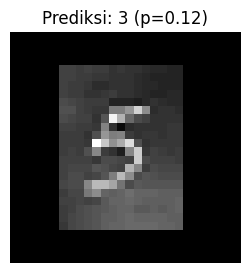

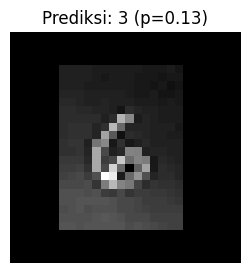

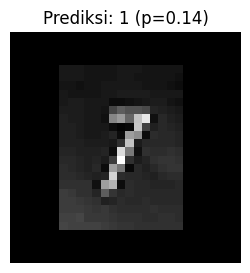

Rekap Prediksi (CNN):
- 5 (3).jpg -> 3 (p=0.121)
- 6 (3).jpg -> 3 (p=0.133)
- 7 (3).jpg -> 1 (p=0.137)


In [30]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file (jpg/png)

# ===== 2) Preprocess utilitas agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - Invert bila latar terang (agar digit jadi putih di atas latar gelap)
    - Crop bounding box digit
    - Resize -> (20x20) lalu pad ke (28x28)
    - Normalisasi ke [0,1] + tambah channel dim
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Invert bila background terang
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1] dan tambah channel dim
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)

    return canvas, arr

# ===== 3) Prediksi dengan CNN (model D3 sudah ada di memori) =====
results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    # Buat batch (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi
    probs = model.predict(x_batch, verbose=0)[0]  # (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# ===== 4) Rekap ringkas =====
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

In [39]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)
# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
 """
 Langkah:
 - Konversi ke grayscale
 - Auto-contrast
 - (Opsional) invert bila latar terang (agar digit jadi putih, latar  jadi gelap seperti MNIST)
 - Crop ke bounding box digit
 - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)  - Normalisasi ke [0,1] dan tambah axis channel
 """
 # Grayscale + autocontrast
 img = img_pil.convert('L')
 img = ImageOps.autocontrast(img)
 arr = np.array(img).astype(np.uint8)
 # Jika rata-rata terang (kertas putih), invert supaya digit menjadi  putih di atas latar gelap (gaya MNIST)
 if arr.mean() > 127:
  img = ImageOps.invert(img)
  arr = np.array(img)
 # Binarisasi ringan untuk cari bbox digit
 thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
 mask = arr > thr
 if mask.any():
  ys, xs = np.where(mask)
  y0, y1 = ys.min(), ys.max()
  x0, x1 = xs.min(), xs.max()
  img = img.crop((x0, y0, x1+1, y1+1))
 # Resize ke 20x20 dengan aspect ratio
 img.thumbnail((20, 20), Image.Resampling.LANCZOS)
 w, h = img.size
 # Pad ke 28x28 dan center
 canvas = Image.new('L', (28, 28), color=0)
 canvas.paste(img, ((28 - w)//2, (28 - h)//2))
 # Normalisasi ke [0,1]
 arr = np.array(canvas).astype('float32') / 255.0
 # Tambah channel dim (28,28,1)
 arr = arr[..., None]
 return canvas, arr

from sklearn.metrics import accuracy_score
results = []
for fname in uploaded.keys():
 img_pil = Image.open(fname)
 _, x = preprocess_to_mnist_28x28(img_pil) # x: (28,28,1) float [0,1]
 x_flat = x.reshape(1, -1) # (1,784)
 pred = int(clf.predict(x_flat)[0])
 # SVM default tidak punya proba kecuali SVC(probability=True). Jika  Anda ingin probabilitas:
 # clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat  pelatihan.
 conf = None
try:
  if hasattr(clf, "predict_proba"):
   conf = float(np.max(clf.predict_proba(x_flat)))
except Exception:
  pass
  results.append((fname, pred, conf))
  # Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap  CNN juga boleh)
  print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf  is not None else ""))

Saving 5.jpg to 5 (6).jpg
Saving 6.jpg to 6 (6).jpg
Saving 7.jpg to 7 (6).jpg
